In [14]:
import pandas as pd
from prophet import Prophet

In [15]:
df = pd.read_csv('../clean_data/data_modif.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.rename(columns={'date': 'ds'})

In [16]:
df['ds']

0      2018-01-20 13:00:00
1      2018-01-30 18:35:00
2      2018-02-19 16:20:00
3      2018-04-06 15:40:00
4      2018-04-12 12:05:00
               ...        
9828   2015-12-07 18:09:00
9829   2015-12-18 16:00:00
9830   2015-12-18 21:59:00
9831   2015-12-20 19:30:00
9832   2015-03-25 15:30:00
Name: ds, Length: 9833, dtype: datetime64[ns]

In [17]:
df['minute'] = df['ds'].dt.minute
df['hour'] = df['ds'].dt.hour
df['day'] = df['ds'].dt.day
df['month'] = df['ds'].dt.month
df['year'] = df['ds'].dt.year
df['ds'] = df['ds'].dt.date

In [18]:
df = (df.groupby([df['minute'], df['hour'], df['day'], df['month'], df['year']])
  .agg({'ds': 'first','Num_Acc' : 'count'})
  .reset_index()
  .drop(columns=['minute', 'hour', 'day', 'month', 'year'])
  .rename(columns={'Num_Acc': 'y'})
)

In [20]:
df['ds'][0]

datetime.date(2011, 10, 1)

In [22]:
model = Prophet()
model.fit(df)

15:22:53 - cmdstanpy - INFO - Chain [1] start processing
15:22:54 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
future_df = model.make_future_dataframe(periods=365)
future_df.tail()

,ds
4442,2019-12-26
4443,2019-12-27
4444,2019-12-28
4445,2019-12-29
4446,2019-12-30


In [24]:
forecast_df = model.predict(future_df)
forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4442,2019-12-26,1.023404,0.911982,1.131207
4443,2019-12-27,1.020564,0.909895,1.127082
4444,2019-12-28,1.015993,0.909456,1.127409
4445,2019-12-29,1.017511,0.910648,1.136432
4446,2019-12-30,1.022387,0.910030,1.132223


In [25]:
forecast_df.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

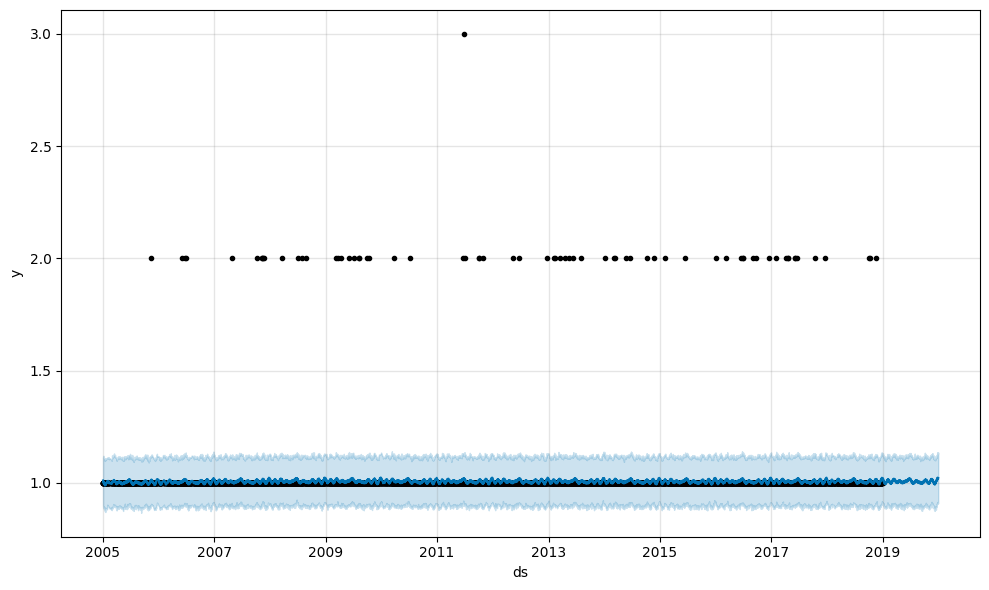

In [26]:
fig1 = model.plot(forecast_df)

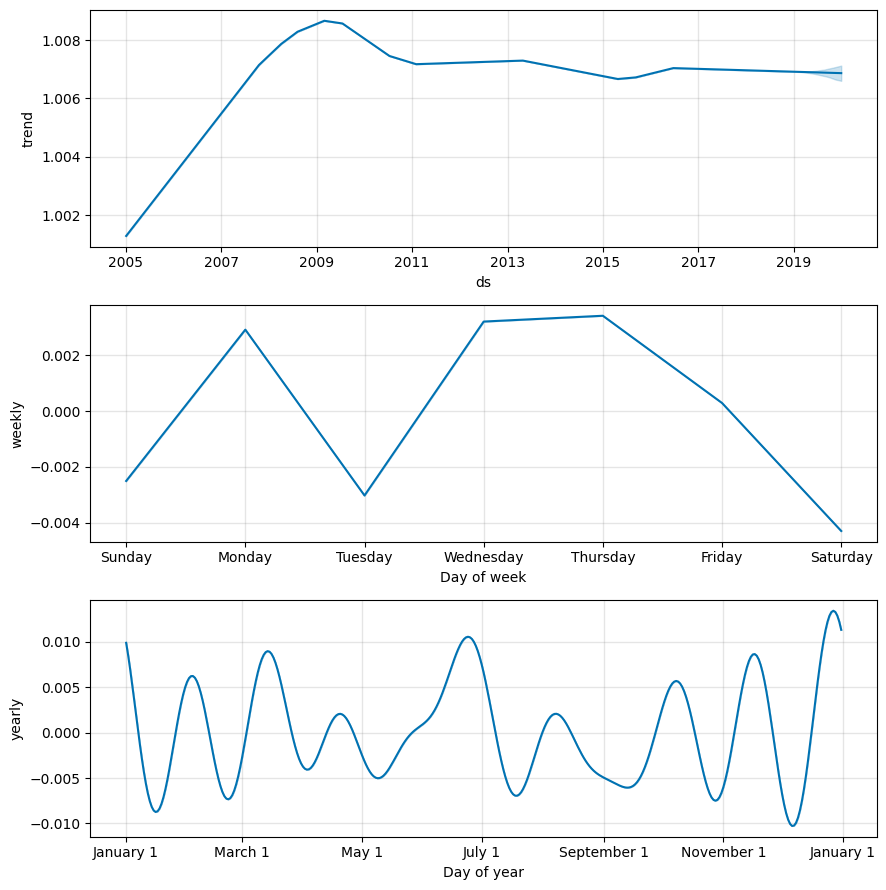

In [27]:
fig2 = model.plot_components(forecast_df);

In [28]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast_df)

In [29]:
plot_components_plotly(model, forecast_df)


In [23]:
d = '2018-12-15 12:24'
_df = pd.DataFrame({'ds': [pd.to_datetime(d).round('minute')]})
round(model.predict(_df)['yhat'][0], 10)

ValueError: Invalid frequency: minute

In [31]:
df

,ds,y
0,2011-10-01,1
1,2006-06-03,1
2,2013-08-05,1
3,2008-06-06,1
4,2013-04-12,1
...,...,...
9757,2016-04-08,1
9758,2008-09-14,1
9759,2007-06-12,1
9760,2015-12-18,1


In [26]:
def predict_n_accidents(d: str, model=model) -> float:
    """
    Takes a date and returns the expected number of accident for this given day.
    """
    _df = pd.DataFrame({'ds': [pd.to_datetime(d).round(freq='T')]})
    return round(model.predict(_df)['yhat'][0], 2)

In [30]:
predict_n_accidents('2027-12-15 22:23')

1.01